In [153]:
import os 
import cv2 as cv
import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt

In [157]:
df = pd.read_csv('utils/hand_labels.csv')

In [158]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,augmented_image349.jpg,250,250,hand,5,39,79,116
1,augmented_image461.jpg,250,250,hand,113,11,211,186
2,augmented_image133.jpg,250,250,hand,46,26,207,159
3,augmented_image279.jpg,250,250,hand,4,14,61,96
4,augmented_image397.jpg,250,250,hand,20,59,63,145


In [159]:
len(df)

92

In [160]:
train = df['filename']

In [161]:
train.head()

0    augmented_image349.jpg
1    augmented_image461.jpg
2    augmented_image133.jpg
3    augmented_image279.jpg
4    augmented_image397.jpg
Name: filename, dtype: object

In [162]:
x_train_path = []
path = f"{os.getcwd()}/utils/scaleImages"
for x in train:
    dirs = os.path.join(path, x)
    x_train_path.append(dirs)

In [163]:
x_train_path[:10]

['/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image349.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image461.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image133.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image279.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image397.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image228.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image412.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image232.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image290.jpg',
 '/home/sammyview80/Desktop/DL/hand/utils/scaleImages/augmented_image173.jpg']

In [164]:
cv.imread(x_train_path[1], 1).shape

(250, 250, 3)

In [165]:
# Showing the image 


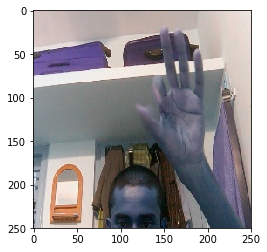

With bounding box:


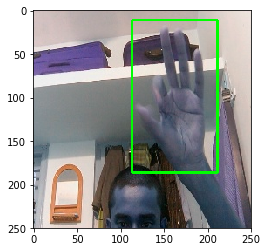

In [166]:
# Showing the actual and label image 
# Getting the first labels parameters
param1 = df.iloc[1].values
_, width, height, cls, xmin, ymin, xmax, ymax = param1

sampleImage = cv.imread(x_train_path[1], 1)
plt.imshow(sampleImage, plt.cm.binary)
plt.show();


print('With bounding box:')
rectangeImage = cv.rectangle(sampleImage, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
plt.imshow(rectangeImage);

In [167]:
# Training Parameter 
labels_param = df.drop(['filename', 'width', 'height'], axis=1)
labels_param.head()

,class,xmin,ymin,xmax,ymax
0,hand,5,39,79,116
1,hand,113,11,211,186
2,hand,46,26,207,159
3,hand,4,14,61,96
4,hand,20,59,63,145


In [168]:
# Changing the hand into integer 
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([('onehot', OneHotEncoder(), ['class'])], remainder='passthrough')

labels_param_transformed = transformer.fit_transform(labels_param)

labels_param_transformed

array([[  1.,   5.,  39.,  79., 116.],
       [  1., 113.,  11., 211., 186.],
       [  1.,  46.,  26., 207., 159.],
       [  1.,   4.,  14.,  61.,  96.],
       [  1.,  20.,  59.,  63., 145.],
       [  1.,  25., 106., 127., 204.],
       [  1.,  30.,  75.,  92., 161.],
       [  1.,  16.,  42.,  66., 110.],
       [  1.,  25.,   3.,  73.,  93.],
       [  1.,  39.,   7., 126., 116.],
       [  1., 190., 170., 247., 239.],
       [  1.,  87.,  38., 191., 167.],
       [  1.,  34.,  77., 147., 182.],
       [  1., 136.,  31., 217., 158.],
       [  1., 116., 100., 176., 226.],
       [  1.,  58.,  27., 166., 165.],
       [  1.,  46.,  44., 171., 162.],
       [  1.,  77.,  75., 143., 205.],
       [  1.,   9.,  35., 121., 170.],
       [  1.,  64.,  21., 137., 153.],
       [  1.,   3.,  94., 133., 189.],
       [  1.,  67., 129., 172., 242.],
       [  1.,  87.,  25., 199., 174.],
       [  1.,  25.,  38., 155., 170.],
       [  1.,  21.,  18., 110., 141.],
       [  1.,  94.,  55.,

In [169]:
# Showing the data in pandas DF
pd.DataFrame(labels_param_transformed, columns=['class', 'x_min', 'y_min', 'x_max' , 'y_max']).head()

,class,x_min,y_min,x_max,y_max
0,1.0,5.0,39.0,79.0,116.0
1,1.0,113.0,11.0,211.0,186.0
2,1.0,46.0,26.0,207.0,159.0
3,1.0,4.0,14.0,61.0,96.0
4,1.0,20.0,59.0,63.0,145.0


In [170]:
# Scaling the data using the sklearn MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=[0, 1])

labels_param_transformed_scaled = scaler.fit_transform(labels_param_transformed)

In [171]:
# showing the labels_param_transformed_scaled
labels_param_transformed_scaled

array([[0.        , 0.01058201, 0.22485207, 0.1185567 , 0.24719101],
       [0.        , 0.58201058, 0.0591716 , 0.79896907, 0.64044944],
       [0.        , 0.22751323, 0.14792899, 0.77835052, 0.48876404],
       [0.        , 0.00529101, 0.07692308, 0.0257732 , 0.13483146],
       [0.        , 0.08994709, 0.34319527, 0.03608247, 0.41011236],
       [0.        , 0.11640212, 0.62130178, 0.36597938, 0.74157303],
       [0.        , 0.14285714, 0.43786982, 0.18556701, 0.5       ],
       [0.        , 0.06878307, 0.24260355, 0.05154639, 0.21348315],
       [0.        , 0.11640212, 0.01183432, 0.08762887, 0.11797753],
       [0.        , 0.19047619, 0.03550296, 0.36082474, 0.24719101],
       [0.        , 0.98941799, 1.        , 0.98453608, 0.93820225],
       [0.        , 0.44444444, 0.21893491, 0.69587629, 0.53370787],
       [0.        , 0.16402116, 0.44970414, 0.46907216, 0.61797753],
       [0.        , 0.7037037 , 0.17751479, 0.82989691, 0.48314607],
       [0.        , 0.5978836 , 0.

In [172]:
# Getting the inverse or the orginal values 
orginal_labels_param_transformed = scaler.inverse_transform(labels_param_transformed_scaled)
# Showing the data in pandas DF
pd.DataFrame(orginal_labels_param_transformed, columns=['class', 'width', 'height', 'x' , 'y']).head()

,class,width,height,x,y
0,1.0,5.0,39.0,79.0,116.0
1,1.0,113.0,11.0,211.0,186.0
2,1.0,46.0,26.0,207.0,159.0
3,1.0,4.0,14.0,61.0,96.0
4,1.0,20.0,59.0,63.0,145.0


In [198]:
# Function to read the path and return imageArray 
def preprocess_image(imagePath, IMG_SIZE=100):
    image = cv.imread(imagePath, 1)
    image = cv.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image/255
    
    return image

In [199]:
x_train = []
for i in x_train_path:
    image = preprocess_image(i)
    
    x_train.append(image)
x_train = np.array(x_train)

In [200]:
# Showing the x_train
x_train[:2]

array([[[[0.8745098 , 0.77254902, 0.92941176],
         [0.87843137, 0.77254902, 0.93333333],
         [0.87843137, 0.76078431, 0.92941176],
         ...,
         [0.8745098 , 0.76862745, 0.92156863],
         [0.8745098 , 0.77254902, 0.92941176],
         [0.87843137, 0.77647059, 0.93333333]],

        [[0.68627451, 0.59215686, 0.75686275],
         [0.68235294, 0.57647059, 0.74509804],
         [0.68235294, 0.56862745, 0.74509804],
         ...,
         [0.8745098 , 0.76862745, 0.92156863],
         [0.8745098 , 0.76862745, 0.9254902 ],
         [0.87843137, 0.77254902, 0.92941176]],

        [[0.66666667, 0.56862745, 0.74117647],
         [0.66666667, 0.56078431, 0.73333333],
         [0.67058824, 0.56078431, 0.7372549 ],
         ...,
         [0.8745098 , 0.76862745, 0.92156863],
         [0.8745098 , 0.76862745, 0.9254902 ],
         [0.87843137, 0.77254902, 0.92941176]],

        ...,

        [[0.8745098 , 0.76470588, 0.92156863],
         [0.88235294, 0.76470588, 0.9254902 ]

In [201]:
# Showing the shape of x_train 
x_train.shape

(92, 100, 100, 3)

In [202]:
# There are 844 image of shape 100*100*3

In [203]:
# Making labels as we are predicting the width, height, x, y 
cls = []
width = []
height = []
x = []
y = []

for c, w, h, x1, y1 in labels_param_transformed_scaled:
    cls.append(c)
    width.append(w)
    height.append(h)
    x.append(x1)
    y.append(y1)
    
cls = np.array(cls)
width = np.array(width)
height = np.array(height)
x = np.array(x)
y = np.array(y)

In [204]:
# Showing the shape of the class, width, height, x, y 
cls.shape, height.shape, x.shape, y.shape

((92,), (92,), (92,), (92,))

In [205]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input, Concatenate

In [206]:
# Creating the model
def create_model(input_shape= None):
    
    f1_shape = (7, 7)
    f1 = 64
    s = (1, 1)
    f2_shape = (5, 5)
    f2 = 32
    
    i = Input(input_shape)
    
    x = Conv2D(64, (11, 11), (3, 3), activation='relu', input_shape=(100, 100, 3))(i)
    x = Conv2D(32, (7, 7), (1, 1), activation='relu')(x)
    x = Conv2D(32, (5, 5), (1, 1), activation='relu')(x)
    
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    x = Dense(512, activation='relu')(x)
    
    
    c = Dense(512, activation='relu', name='class1')(x)
    c = Dropout(0.3)(c)
    c = BatchNormalization()(c)
    c = Dense(256, activation='softmax', name='class2')(c)
    c = Dropout(0.3)(c)
    c = BatchNormalization()(c)
    c = Dense(126, activation='softmax', name='class3')(c)
    c = Dropout(0.3)(c)
    c = BatchNormalization()(c)    
    c = Dense(1, activation='sigmoid', name='class')(c)

    x1 = Dense(512, activation='relu', name='x1')(x)
    x1 = Dropout(0.3)(x1)
    x1 = BatchNormalization()(x1)
    x1 = tf.keras.layers.add([x, x1])
    x1 = Dense(256, activation='relu', name='x2')(x1)
    x1 = Dropout(0.3)(x1)
    
    x1 = BatchNormalization()(x1)
    
    x1 = Dense(126, activation='relu', name='x3')(x1)
    x1 = Dropout(0.3)(x1)
    x1 = BatchNormalization()(x1)
    x1 = Dense(2, activation='relu', name='x')(x1)
    
    y1 = Dense(512, activation='relu', name='y1')(x)
    y1 = Dropout(0.3)(y1)
    
    y1 = BatchNormalization()(y1)
    y1 = tf.keras.layers.add([x, y1])
    y1 = Dense(256, activation='relu', name='y2')(y1)
    
    y1 = Dropout(0.3)(y1)
    y1 = BatchNormalization()(y1)
    y1 = Dense(126, activation='relu', name='y3')(y1)
    y1 = Dropout(0.3)(y1)
    y1 = BatchNormalization()(y1)
    y1 = Dense(2, activation='relu', name='y')(y1)
    
    w = Dense(512, activation='relu', name='width1')(x)
    w = Dropout(0.3)(w)
#     w = BatchNormalization()(w)
    w = tf.keras.layers.add([x, w])
    w = Dense(256, activation='relu', name='width2')(w)
    w = Dropout(0.3)(w)
    w = BatchNormalization()(w)
    w = Dense(126, activation='relu', name='width3')(w)
    w = Dropout(0.3)(w)
    w = BatchNormalization()(w)
    w = Dense(2, activation='relu', name='width')(w)
    
    h = Dense(512, activation='relu', name='height1')(x)
    h = Dropout(0.3)(h)
#     h = Concatenate([x, h])
    h = tf.keras.layers.add([x, h])
#     h = BatchNormalization()(h)
    h = Dense(256, activation='relu', name='height2')(h)
    h = Dropout(0.3)(h)
    h = BatchNormalization()(h)
    h = Dense(126, activation='relu', name='height3')(h)
    h = Dropout(0.3)(h)
    h = BatchNormalization()(h)
    h = Dense(2, activation='relu', name='height')(h)

    
    output = tf.keras.models.Model(inputs=i, outputs=[c, x1, y1, w, h])
    
    return output


def mse(y_true, y_preds):
    regression_loss = tf.multiply(tf.reduce_mean(tf.square(y_preds - y_true)), 1.0)
    return regression_loss

def mae(y_true, y_preds):
    return tf.math.reduce_sum(tf.math.abs(y_preds - y_true))

In [207]:
model = create_model(input_shape=(100, 100, 3))

In [208]:
model.compile(loss={'class':tf.keras.losses.BinaryCrossentropy(), 
                    'x':mse,
                    'y':mse,
                    'width':mae,
                    'height':mae,
                   }, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

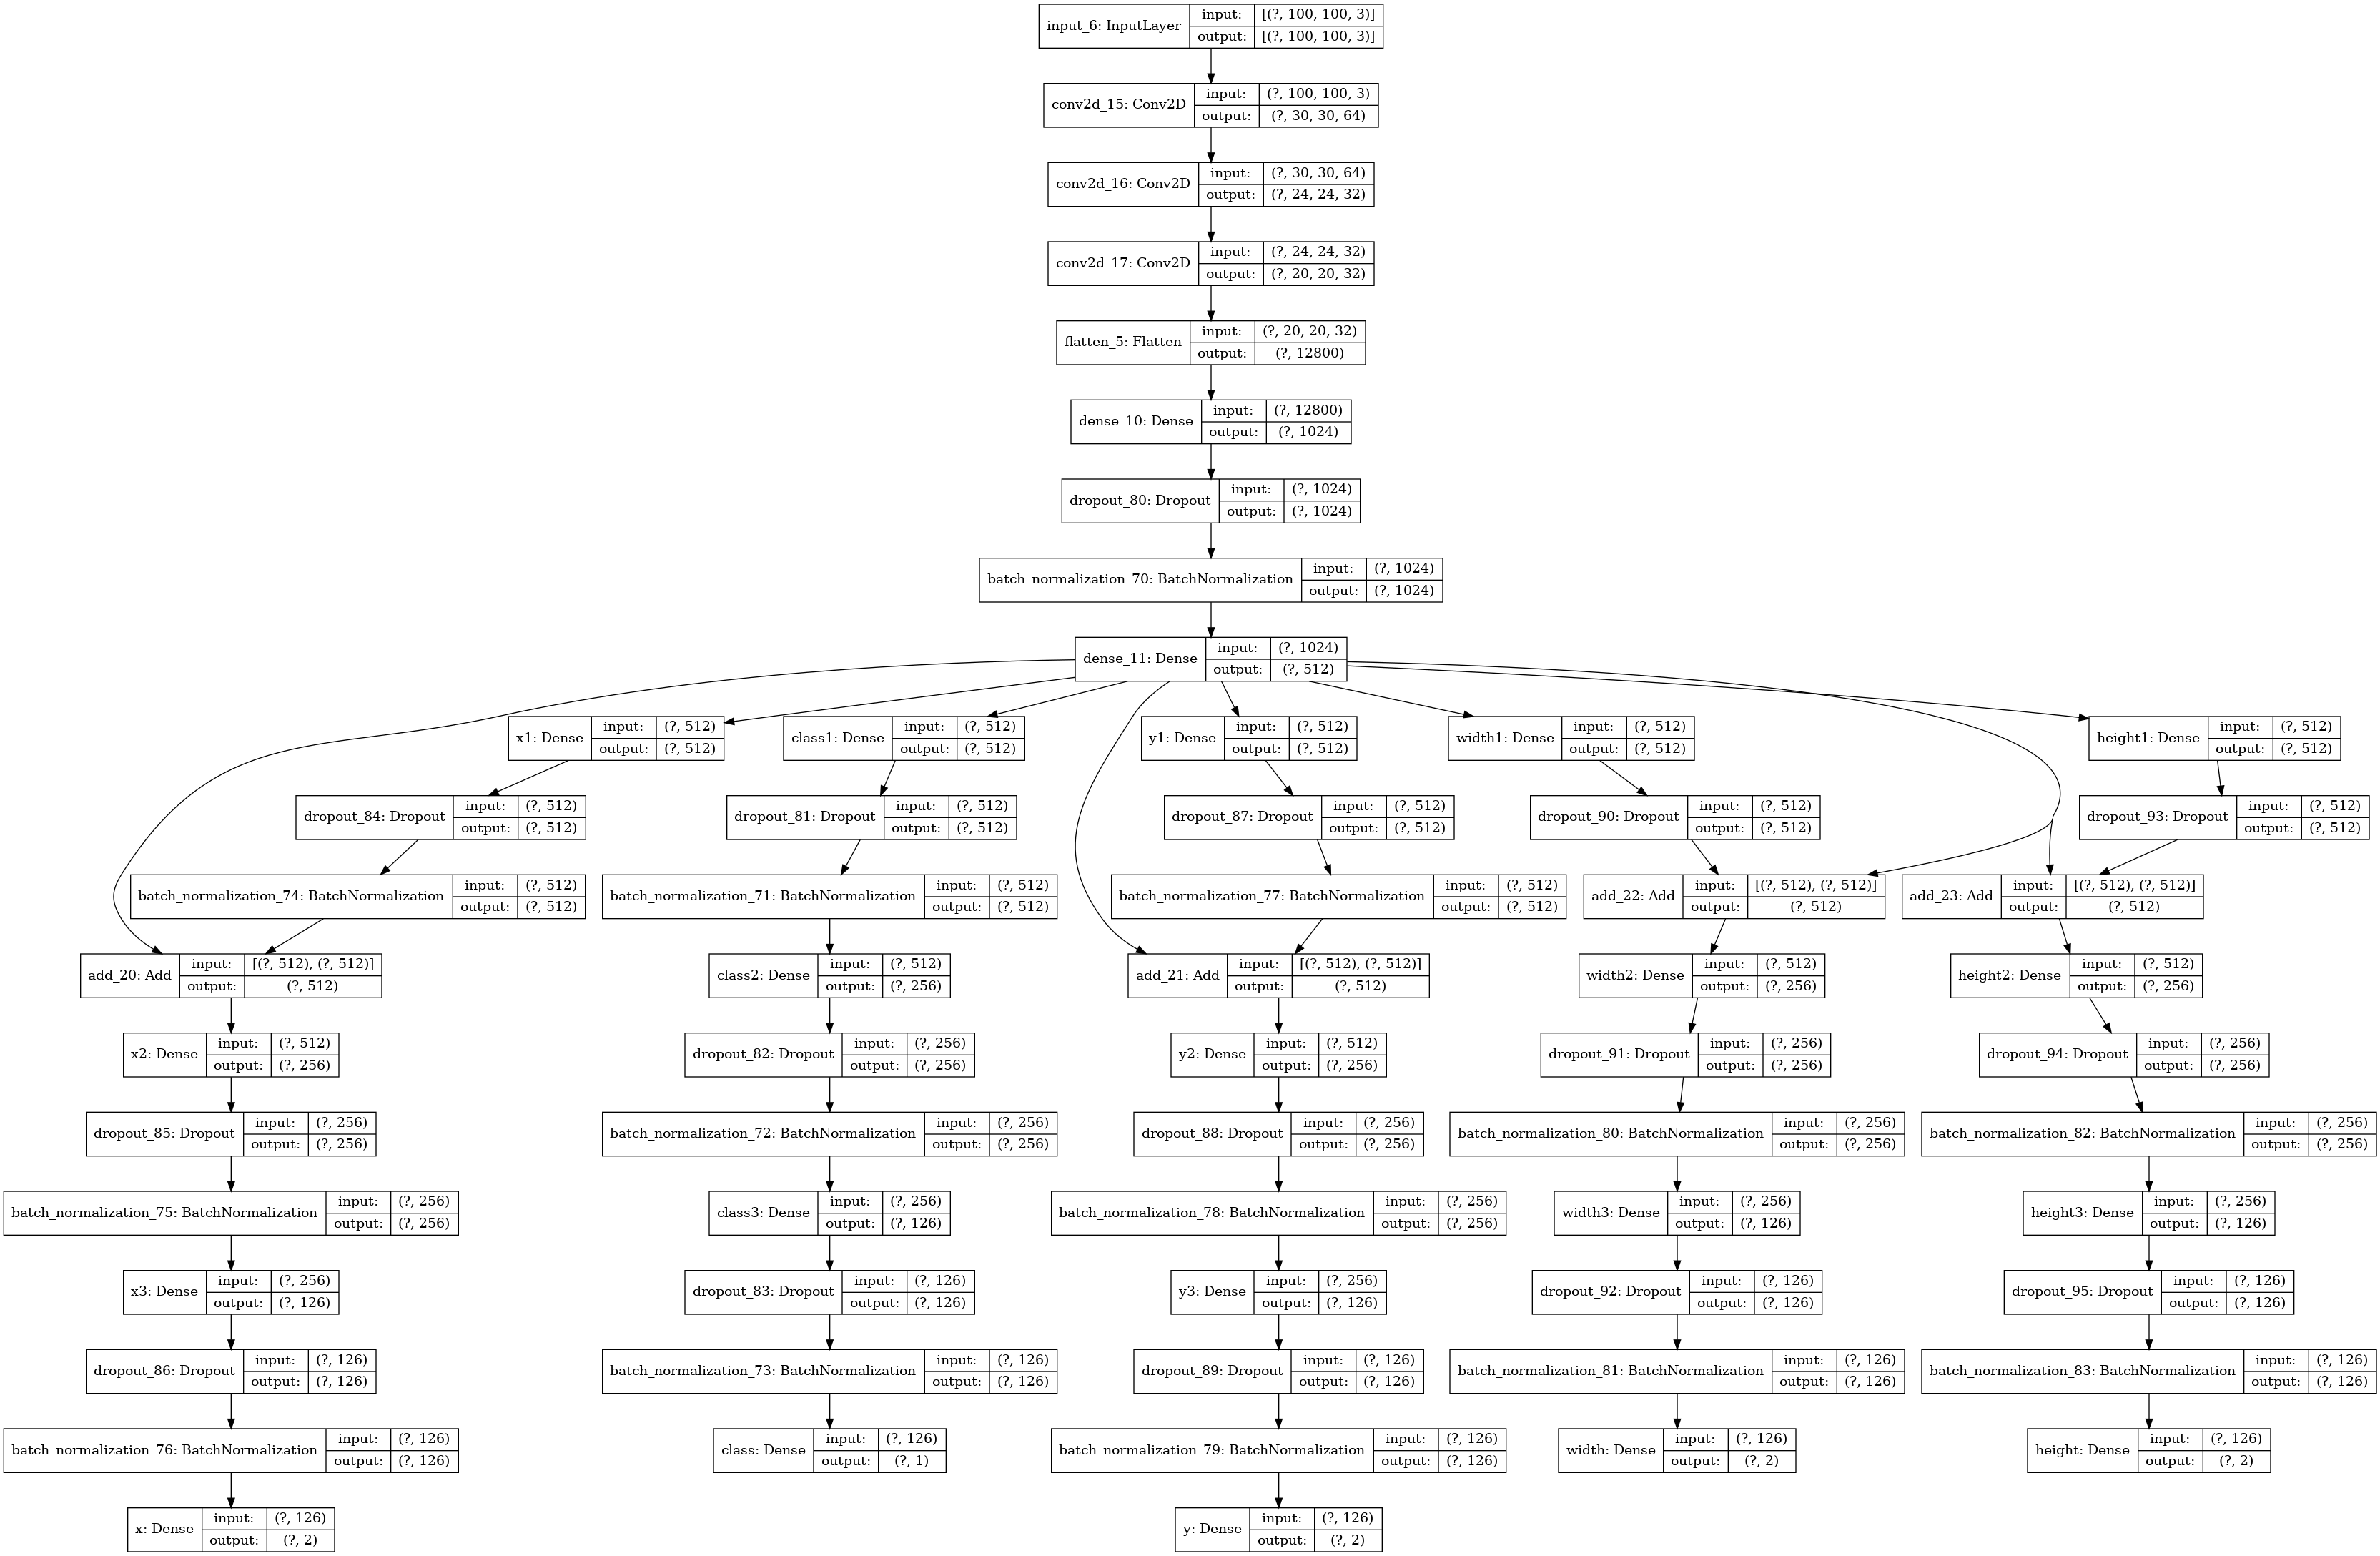

In [209]:
tf.keras.utils.plot_model(model, to_file="model.png",show_shapes=True,show_layer_names=True)

In [210]:
# model.compile(loss={'class':tf.keras.losses.BinaryCrossentropy(), 
#                     'x':tf.keras.losses.Poisson(),
#                     'y':tf.keras.losses.Poisson(),
#                     'width':tf.keras.losses.Poisson(),
#                     'height':tf.keras.losses.Poisson(),
#                    }, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [211]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 30, 30, 64)   23296       input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 24, 24, 32)   100384      conv2d_15[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 20, 20, 32)   25632       conv2d_16[0][0]                  
____________________________________________________________________________________________

In [212]:
np.random.seed(42)
history = model.fit(x_train, [cls, x, y, width, height], verbose=True, epochs=10)

Train on 92 samples
Epoch 1/10
92/92 [==============================] - 5s 59ms/sample - loss: 76.5773 - class_loss: 0.6936 - x_loss: 1.0509 - y_loss: 0.5608 - width_loss: 34.1777 - height_loss: 39.7306 - class_accuracy: 0.4891 - x_accuracy: 0.6522 - y_accuracy: 0.5870 - width_accuracy: 0.6739 - height_accuracy: 0.6739
Epoch 2/10
92/92 [==============================] - 1s 9ms/sample - loss: 65.0370 - class_loss: 0.6729 - x_loss: 0.6796 - y_loss: 0.7068 - width_loss: 28.9494 - height_loss: 33.6651 - class_accuracy: 0.5761 - x_accuracy: 0.6739 - y_accuracy: 0.6304 - width_accuracy: 0.6304 - height_accuracy: 0.6196
Epoch 3/10
92/92 [==============================] - 1s 9ms/sample - loss: 70.7686 - class_loss: 0.6506 - x_loss: 0.7820 - y_loss: 0.6479 - width_loss: 33.6464 - height_loss: 34.8222 - class_accuracy: 0.6413 - x_accuracy: 0.6848 - y_accuracy: 0.6196 - width_accuracy: 0.5978 - height_accuracy: 0.5543
Epoch 4/10
92/92 [==============================] - 1s 9ms/sample - loss: 69.59

In [213]:
model.predict(np.random.rand(1, 100, 100, 3))

[array([[0.37083787]], dtype=float32),
 array([[9.731483 , 2.1531124]], dtype=float32),
 array([[2.132635, 0.      ]], dtype=float32),
 array([[0.       , 0.5760985]], dtype=float32),
 array([[2.1303763, 0.       ]], dtype=float32)]

In [214]:
# Image Preprocess
def preprocess_image(image):
    IMG_SIZE = 100
    image = cv.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image/255
    image = image.reshape(1, IMG_SIZE, IMG_SIZE, 3)
    
    return image 

In [215]:
# Function that retuns the class x, y, widht, height 
def get_prediction(image):
    non_scales = []
    image = preprocess_image(image)
    prediction = model.predict(image)
    for i in prediction:
        non_scales.append(np.argmax(i))
    
    non_scales = np.array(non_scales)
    
    (cls, x, y ,width, height) = scaler.inverse_transform(non_scales.reshape(1, -1)).squeeze()
    
    return (int(cls), int(x), int(y) ,int(width), int(height))

(1, 3, 1, 55, 72)


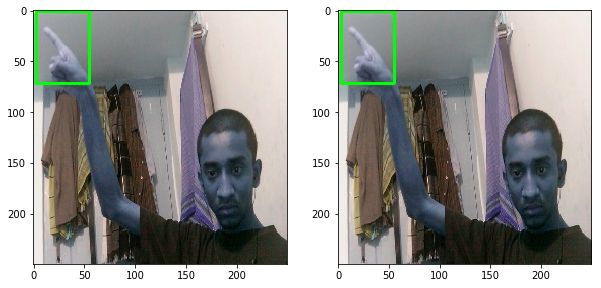

In [221]:
def show_prediction(box, sampleImage):
    sampleImage = cv.resize(sampleImage, (250, 250))
    image = cv.rectangle(sampleImage, (box[1], box[2]), (box[3], box[4]), (0, 255, 0), 2)
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image, plt.cm.binary)
    plt.subplot(1, 2, 2)
    plt.imshow(sampleImage, plt.cm.binary)
    plt.show()

    
sampleImage = cv.imread(x_train_path[3], 1)
box = get_prediction(sampleImage)
print(box)
show_prediction(box, sampleImage)
    
    

In [104]:
# # All thought result is not accurate let's test on real data 

# cap = cv.VideoCapture(0)

# while True:
#     sucess, frames = cap.read()
    
    

#     # Sent to the model 
#     cls, x, y, widht, height = get_prediction(frames) 
    
# #     print(cls, x, y, widht, height)
# #     cv.imshow('frames', frames)
# #     cv.rectangle(frames, (x, y), (x+width, y+height), (0, 255, 0), 3)
#     cv.putText(frames, str(cls), (x+2, y+2), cv.FONT_HERSHEY_SIMPLEX, 6, (0, 255, 0), 5, cv.LINE_AA)
#     cv.imshow('frames', frames)
    
#     k = cv.waitKey(1) & 0xFF
#     if k == 27:
#         break 

# cap.release()
# cv.destroyAllWindows()

    
